<a href="https://colab.research.google.com/github/gnitnaw/LDL/blob/main/tf_framework/c6e2_boston_conf6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
The MIT License (MIT)
Copyright (c) 2021 NVIDIA
Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""


'\nThe MIT License (MIT)\nCopyright (c) 2021 NVIDIA\nPermission is hereby granted, free of charge, to any person obtaining a copy of\nthis software and associated documentation files (the "Software"), to deal in\nthe Software without restriction, including without limitation the rights to\nuse, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of\nthe Software, and to permit persons to whom the Software is furnished to do so,\nsubject to the following conditions:\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS\nFOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR\nCOPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER\nIN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OU

This code example is very similar to c6e1_boston but the network is modified to use more layers with more neurons as well as dropout regularization. More context for this code example can be found in the section "Experiment: Deeper and Regularized Models for House Price Prediction" in Chapter 6 in the book Learning Deep Learning by Magnus Ekman (ISBN: 9780137470358).

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
import logging
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 500
BATCH_SIZE = 16

# Read and standardize the data.
boston_housing = keras.datasets.boston_housing
(raw_x_train, y_train), (raw_x_test,
    y_test) = boston_housing.load_data()
x_mean = np.mean(raw_x_train, axis=0)
x_stddev = np.std(raw_x_train, axis=0)
x_train =(raw_x_train - x_mean) / x_stddev
x_test =(raw_x_test - x_mean) / x_stddev

# Create and train model.

# Conf. 1
print("========================= Conf. 1 =============================")
model1 = Sequential()
model1.add(Dense(1, activation='linear', input_shape=[13]))
model1.compile(loss='mean_squared_error', optimizer='adam',
              metrics =['mean_absolute_error'])
model1.summary()
history1 = model1.fit(x_train, y_train, validation_data=(
    x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE,
    verbose=2, shuffle=True)

# Conf. 2
print("========================= Conf. 2 =============================")
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=[13]))
model2.add(Dense(64, activation='relu')) # We are doing DL!
model2.add(Dense(1, activation='linear'))
model2.compile(loss='mean_squared_error', optimizer='adam',
              metrics =['mean_absolute_error'])
model2.summary()
history2 = model2.fit(x_train, y_train, validation_data=(
    x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE,
    verbose=2, shuffle=True)

# Conf. 3
print("========================= Conf. 3 =============================")
model3 = Sequential()
model3.add(Dense(64, activation='relu', 
                 kernel_regularizer=l2(0.1),
                 bias_regularizer=l2(0.1),
                 input_shape=[13]))
model3.add(Dense(64, activation='relu',
           kernel_regularizer=l2(0.1),
           bias_regularizer=l2(0.1))) 

model3.add(Dense(1, activation='linear',
           kernel_regularizer=l2(0.1),
           bias_regularizer=l2(0.1)))
model3.compile(loss='mean_squared_error', optimizer='adam',
              metrics =['mean_absolute_error'])
model3.summary()
history3 = model3.fit(x_train, y_train, validation_data=(
    x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE,
    verbose=2, shuffle=True)

# Conf. 4
print("========================= Conf. 4 =============================")
model4 = Sequential()
model4.add(Dense(64, activation='relu', input_shape=[13]))
model4.add(Dropout(0.2))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='linear'))
model4.compile(loss='mean_squared_error', optimizer='adam',
              metrics =['mean_absolute_error'])
model4.summary()
history4 = model4.fit(x_train, y_train, validation_data=(
    x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE,
    verbose=2, shuffle=True)

# Conf. 5
print("========================= Conf. 5 =============================")
model5 = Sequential()
model5.add(Dense(128, activation='relu', input_shape=[13]))
model5.add(Dropout(0.2))
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(1, activation='linear'))
model5.compile(loss='mean_squared_error', optimizer='adam',
              metrics =['mean_absolute_error'])
model5.summary()
history5 = model5.fit(x_train, y_train, validation_data=(
    x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE,
    verbose=2, shuffle=True)

# Conf. 6
print("========================= Conf. 6 =============================")
model6 = Sequential()
model6.add(Dense(128, activation='relu', input_shape=[13]))
model6.add(Dropout(0.3))
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.3))
model6.add(Dense(64, activation='relu'))
model6.add(Dropout(0.3))
model6.add(Dense(1, activation='linear'))
model6.compile(loss='mean_squared_error', optimizer='adam',
              metrics =['mean_absolute_error'])
model6.summary()
history6 = model6.fit(x_train, y_train, validation_data=(
    x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE,
    verbose=2, shuffle=True)


Streaming output truncated to the last 5000 lines.
Epoch 43/500
26/26 - 0s - loss: 8.5251 - mean_absolute_error: 2.1106 - val_loss: 19.2825 - val_mean_absolute_error: 2.8724 - 93ms/epoch - 4ms/step
Epoch 44/500
26/26 - 0s - loss: 8.2402 - mean_absolute_error: 2.0527 - val_loss: 20.9918 - val_mean_absolute_error: 3.0429 - 84ms/epoch - 3ms/step
Epoch 45/500
26/26 - 0s - loss: 8.3203 - mean_absolute_error: 2.0927 - val_loss: 19.9323 - val_mean_absolute_error: 2.9285 - 85ms/epoch - 3ms/step
Epoch 46/500
26/26 - 0s - loss: 8.0544 - mean_absolute_error: 2.0322 - val_loss: 20.6952 - val_mean_absolute_error: 2.9842 - 84ms/epoch - 3ms/step
Epoch 47/500
26/26 - 0s - loss: 8.0189 - mean_absolute_error: 2.0611 - val_loss: 19.8590 - val_mean_absolute_error: 2.8907 - 90ms/epoch - 3ms/step
Epoch 48/500
26/26 - 0s - loss: 8.0194 - mean_absolute_error: 2.0024 - val_loss: 20.7302 - val_mean_absolute_error: 2.9600 - 91ms/epoch - 4ms/step
Epoch 49/500
26/26 - 0s - loss: 7.9421 - mean_absolute_error: 2.016

In [3]:
# Print first 4 predictions.
predictions = model1.predict(x_test)
for i in range(0, 4):
    print('Prediction: ', predictions[i, 0],
          ', true value: ', y_test[i])
    
predictions = model2.predict(x_test)
for i in range(0, 4):
    print('Prediction: ', predictions[i, 0],
          ', true value: ', y_test[i])
    
predictions = model3.predict(x_test)
for i in range(0, 4):
    print('Prediction: ', predictions[i, 0],
          ', true value: ', y_test[i])
    
predictions = model4.predict(x_test)
for i in range(0, 4):
    print('Prediction: ', predictions[i, 0],
          ', true value: ', y_test[i])
    
predictions = model5.predict(x_test)
for i in range(0, 4):
    print('Prediction: ', predictions[i, 0],
          ', true value: ', y_test[i])
    
predictions = model6.predict(x_test)
for i in range(0, 4):
    print('Prediction: ', predictions[i, 0],
          ', true value: ', y_test[i])

Prediction:  0.23345375 , true value:  7.2
Prediction:  10.466225 , true value:  18.8
Prediction:  11.149673 , true value:  19.0
Prediction:  22.52496 , true value:  27.0
Prediction:  6.564659 , true value:  7.2
Prediction:  17.747587 , true value:  18.8
Prediction:  20.421497 , true value:  19.0
Prediction:  31.43094 , true value:  27.0
Prediction:  8.418002 , true value:  7.2
Prediction:  17.814085 , true value:  18.8
Prediction:  21.450037 , true value:  19.0
Prediction:  33.56864 , true value:  27.0
Prediction:  8.498041 , true value:  7.2
Prediction:  19.005108 , true value:  18.8
Prediction:  21.059185 , true value:  19.0
Prediction:  34.599564 , true value:  27.0
Prediction:  9.235109 , true value:  7.2
Prediction:  17.745361 , true value:  18.8
Prediction:  20.08208 , true value:  19.0
Prediction:  29.801033 , true value:  27.0
Prediction:  8.382671 , true value:  7.2
Prediction:  18.240494 , true value:  18.8
Prediction:  20.691189 , true value:  19.0
Prediction:  29.969313 , 

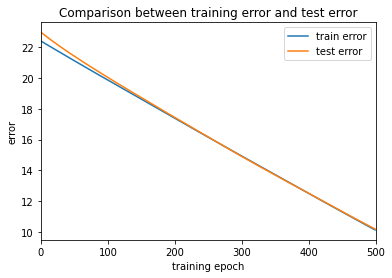

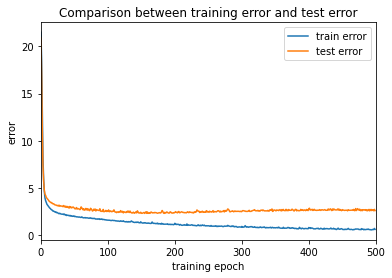

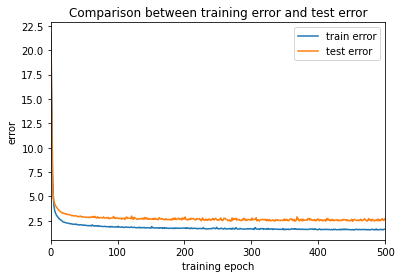

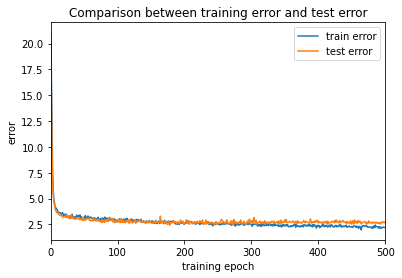

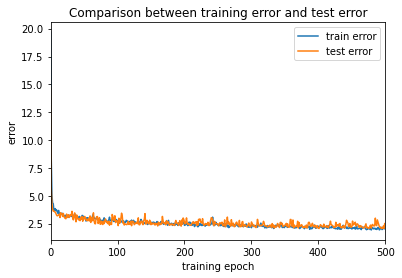

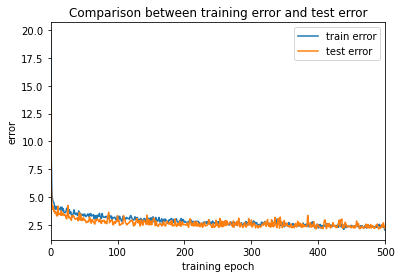

In [4]:
plt.plot(history1.history['mean_absolute_error'])
plt.plot(history1.history['val_mean_absolute_error'])
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,500)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(history2.history['mean_absolute_error'])
plt.plot(history2.history['val_mean_absolute_error'])
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,500)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(history3.history['mean_absolute_error'])
plt.plot(history3.history['val_mean_absolute_error'])
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,500)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(history4.history['mean_absolute_error'])
plt.plot(history4.history['val_mean_absolute_error'])
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,500)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(history5.history['mean_absolute_error'])
plt.plot(history5.history['val_mean_absolute_error'])
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,500)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(history6.history['mean_absolute_error'])
plt.plot(history6.history['val_mean_absolute_error'])
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,500)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()